In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("data/2016 School Explorer.csv")
shsat = pd.read_csv("data/D5 SHSAT Registrations and Testers.csv")
safety = pd.read_csv("data/2010-2016-school-safety-report.csv")

In [9]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(1272, 161)

In [16]:
df.info(verbose=True,
        show_counts=True
        )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
 #    Column                                              Non-Null Count  Dtype  
---   ------                                              --------------  -----  
 0    Adjusted Grade                                      2 non-null      object 
 1    New?                                                27 non-null     object 
 2    Other Location Code in LCGMS                        1 non-null      object 
 3    School Name                                         1272 non-null   object 
 4    SED Code                                            1272 non-null   int64  
 5    Location Code                                       1272 non-null   object 
 6    District                                            1272 non-null   int64  
 7    Latitude                                            1272 non-null   float64
 8    Longitude                                           1272 non-null 

Some column have dtype as object we need to fix this first .

In [28]:
object_col = df.select_dtypes(include="object").columns

In [29]:
df[object_col]

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,Location Code,Address (Full),City,Grades,Grade Low,Grade High,...,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,01M015,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,...,Meeting Target,86%,Exceeding Target,91%,Exceeding Target,85%,Meeting Target,94%,Exceeding Target,Approaching Target
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,01M019,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,...,NaN,97%,NaN,90%,Exceeding Target,86%,Meeting Target,94%,Meeting Target,Exceeding Target
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,01M020,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,...,Meeting Target,82%,Approaching Target,61%,Not Meeting Target,80%,Approaching Target,79%,Not Meeting Target,Approaching Target
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05,06,07,08",PK,08,...,Meeting Target,82%,Meeting Target,73%,Approaching Target,89%,Meeting Target,88%,Meeting Target,Exceeding Target
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,01M063,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,...,Meeting Target,87%,Meeting Target,81%,Meeting Target,89%,Meeting Target,93%,Meeting Target,Meeting Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,NaN,NaN,NaN,FAMILY LIFE ACADEMY CHARTER SCHOOL,84X705,"14 W 170TH ST BRONX, NY 10452",BRONX,"0K,01,02,03,04,05",0K,05,...,Exceeding Target,94%,Exceeding Target,88%,Meeting Target,83%,Meeting Target,94%,Meeting Target,Meeting Target
1268,NaN,NaN,NaN,HARRIET TUBMAN CHARTER SCHOOL,84X706,"3565 3RD AVE BRONX, NY 10456",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,...,Meeting Target,88%,Meeting Target,88%,Exceeding Target,88%,Meeting Target,93%,Meeting Target,Meeting Target
1269,NaN,NaN,NaN,ICAHN CHARTER SCHOOL,84X717,"1525 BROOK AVE BRONX, NY 10457",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,...,Exceeding Target,89%,Meeting Target,84%,Meeting Target,86%,Meeting Target,94%,Meeting Target,Meeting Target
1270,NaN,NaN,NaN,BRONX CHARTER SCHOOL FOR BETTER LEARNING,84X718,"3740 BAYCHESTER AVE ANNEX BRONX, NY 10466",BRONX,"0K,01,02,03,04,05",0K,05,...,Meeting Target,96%,Exceeding Target,89%,Exceeding Target,91%,Exceeding Target,95%,Exceeding Target,Meeting Target


Some columns having percentage symbol so pandas treating those columns as object .So we will remove the percentage symbol from the data.

In [31]:
percent_col = object_col[object_col.str.contains("%|Percent|Rate")]

In [33]:
df[percent_col].head()

,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
0,9%,5%,32%,60%,92%,1%,94%,18%,89%,94%,86%,91%,85%,94%
1,5%,10%,20%,63%,83%,6%,92%,30%,96%,96%,97%,90%,86%,94%
2,15%,35%,8%,49%,57%,4%,94%,20%,87%,77%,82%,61%,80%,79%
3,7%,5%,29%,63%,92%,4%,92%,28%,85%,78%,82%,73%,89%,88%
4,3%,4%,20%,65%,84%,10%,93%,23%,90%,88%,87%,81%,89%,93%


In [49]:
df[percent_col]=df[percent_col].transform(lambda x : ((x.str.strip("%")).astype("float"))/100)

In [50]:
df.info(verbose=True,
        show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
 #    Column                                              Non-Null Count  Dtype  
---   ------                                              --------------  -----  
 0    Adjusted Grade                                      2 non-null      object 
 1    New?                                                27 non-null     object 
 2    Other Location Code in LCGMS                        1 non-null      object 
 3    School Name                                         1272 non-null   object 
 4    SED Code                                            1272 non-null   int64  
 5    Location Code                                       1272 non-null   object 
 6    District                                            1272 non-null   int64  
 7    Latitude                                            1272 non-null   float64
 8    Longitude                                           1272 non-null 

In [51]:
df.select_dtypes(include="object")

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,Location Code,Address (Full),City,Grades,Grade Low,Grade High,Community School?,School Income Estimate,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,01M015,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,Yes,"$31,141.72",Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Approaching Target
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,01M019,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,"$56,462.88",NaN,NaN,NaN,Exceeding Target,Meeting Target,Meeting Target,Exceeding Target
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,01M020,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,"$44,342.61",Meeting Target,Meeting Target,Approaching Target,Not Meeting Target,Approaching Target,Not Meeting Target,Approaching Target
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05,06,07,08",PK,08,No,"$31,454.00",Approaching Target,Meeting Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Exceeding Target
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,01M063,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,"$46,435.59",Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,NaN,NaN,NaN,FAMILY LIFE ACADEMY CHARTER SCHOOL,84X705,"14 W 170TH ST BRONX, NY 10452",BRONX,"0K,01,02,03,04,05",0K,05,No,"$27,243.69",Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
1268,NaN,NaN,NaN,HARRIET TUBMAN CHARTER SCHOOL,84X706,"3565 3RD AVE BRONX, NY 10456",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,No,"$24,172.46",Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target
1269,NaN,NaN,NaN,ICAHN CHARTER SCHOOL,84X717,"1525 BROOK AVE BRONX, NY 10457",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,No,"$26,422.05",Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
1270,NaN,NaN,NaN,BRONX CHARTER SCHOOL FOR BETTER LEARNING,84X718,"3740 BAYCHESTER AVE ANNEX BRONX, NY 10466",BRONX,"0K,01,02,03,04,05",0K,05,No,"$47,192.42",Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target


School income estimate contains the $  and , we need to fix this.

In [57]:
df["School Income Estimate"] = df["School Income Estimate"].astype("str").replace("[$,]","",regex=True).astype("float")

In [58]:
df.select_dtypes(include="object")

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,Location Code,Address (Full),City,Grades,Grade Low,Grade High,Community School?,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,01M015,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,Yes,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Approaching Target
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,01M019,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,NaN,NaN,NaN,Exceeding Target,Meeting Target,Meeting Target,Exceeding Target
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,01M020,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,Meeting Target,Meeting Target,Approaching Target,Not Meeting Target,Approaching Target,Not Meeting Target,Approaching Target
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05,06,07,08",PK,08,No,Approaching Target,Meeting Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Exceeding Target
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,01M063,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,"PK,0K,01,02,03,04,05",PK,05,No,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,NaN,NaN,NaN,FAMILY LIFE ACADEMY CHARTER SCHOOL,84X705,"14 W 170TH ST BRONX, NY 10452",BRONX,"0K,01,02,03,04,05",0K,05,No,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
1268,NaN,NaN,NaN,HARRIET TUBMAN CHARTER SCHOOL,84X706,"3565 3RD AVE BRONX, NY 10456",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,No,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target
1269,NaN,NaN,NaN,ICAHN CHARTER SCHOOL,84X717,"1525 BROOK AVE BRONX, NY 10457",BRONX,"0K,01,02,03,04,05,06,07,08",0K,08,No,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target
1270,NaN,NaN,NaN,BRONX CHARTER SCHOOL FOR BETTER LEARNING,84X718,"3740 BAYCHESTER AVE ANNEX BRONX, NY 10466",BRONX,"0K,01,02,03,04,05",0K,05,No,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target


<AxesSubplot:>

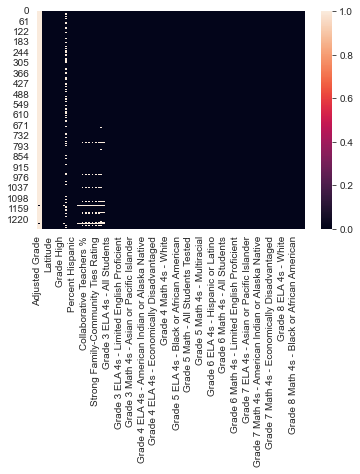

In [64]:
sns.heatmap(df[df])

In [68]:
null_col = df.columns[df.isnull().any()]
null_col

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS',
       'Economic Need Index', 'School Income Estimate',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Rigorous Instruction Rating',
       'Collaborative Teachers %', 'Collaborative Teachers Rating',
       'Supportive Environment %', 'Supportive Environment Rating',
       'Effective School Leadership %', 'Effective School Leadership Rating',
       'Strong Family-Community Ties %', 'Strong Family-Community Ties Rating',
       'Trust %', 'Trust Rating', 'Student Achievement Rating',
       'Average ELA Proficiency', 'Average Math Proficiency'],
      dtype='object')

<AxesSubplot:>

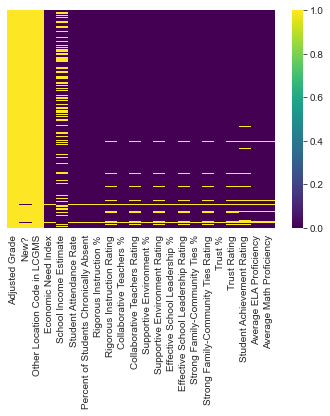

In [73]:
sns.heatmap(df[null_col].isnull(),yticklabels=False,cmap="viridis")

In [74]:
import missingno as msno

<AxesSubplot:>

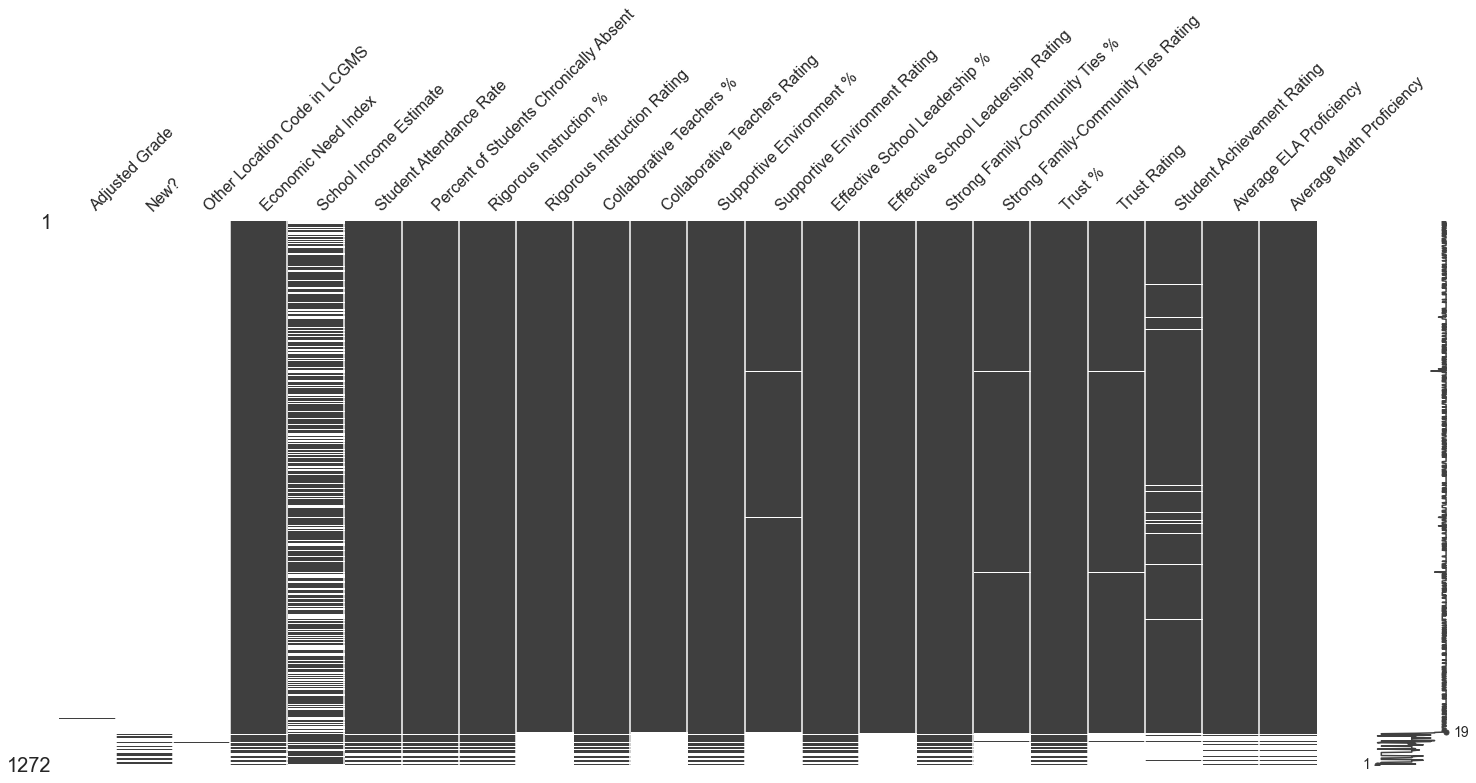

In [84]:
msno.matrix(df[null_col].sort_values("Rigorous Instruction Rating",ascending=False))

In [83]:
df["Economic Need Index"].sort_values()

57      0.049
64      0.059
60      0.064
54      0.065
30      0.066
        ...  
1242      NaN
1244      NaN
1245      NaN
1252      NaN
1259      NaN
Name: Economic Need Index, Length: 1272, dtype: float64